# **ResNet18**

In [ ]:
!pip install ipython-autotime
get_ipython().run_line_magic('load_ext', 'autotime')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.4 MB/s 
time: 619 µs (started: 2022-12-04 22:47:07 +00:00)


# Data Aquisition: DiBAS Dataset

In [ ]:
!git clone https://github.com/YuandiWu/DiBAS-Images.git

Cloning into 'DiBAS-Images'...
remote: Enumerating objects: 803, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 803 (delta 8), reused 177 (delta 0), pack-reused 584
Receiving objects: 100% (803/803), 4.15 GiB | 29.13 MiB/s, done.
Resolving deltas: 100% (33/33), done.
Checking out files: 100% (690/690), done.
time: 4min 21s (started: 2022-12-04 22:47:07 +00:00)


In [ ]:
!ls DiBAS-Images/train

Acinetobacter.baumanii	   Lactobacillus.plantarum
Actinomyces.israeli	   Lactobacillus.reuteri
Bacteroides.fragilis	   Lactobacillus.rhamnosus
Bifidobacterium.spp	   Lactobacillus.salivarius
Candida.albicans	   Listeria.monocytogenes
Clostridium.perfringens    Micrococcus.spp
Enterococcus.faecalis	   Neisseria.gonorrhoeae
Enterococcus.faecium	   Porfyromonas.gingivalis
Escherichia.coli	   Propionibacterium.acnes
Fusobacterium		   Proteus
Lactobacillus.casei	   Pseudomonas.aeruginosa
Lactobacillus.crispatus    Staphylococcus.aureus
Lactobacillus.delbrueckii  Staphylococcus.epidermidis
Lactobacillus.gasseri	   Staphylococcus.saprophiticus
Lactobacillus.jehnsenii    Streptococcus.agalactiae
Lactobacillus.johnsonii    Veionella
Lactobacillus.paracasei
time: 148 ms (started: 2022-12-04 22:51:28 +00:00)


# Library Imports

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader,TensorDataset,random_split,SubsetRandomSampler, ConcatDataset
from torchvision import datasets, transforms, models

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import random

time: 4.45 s (started: 2022-12-04 22:51:29 +00:00)


# Data Pre-processsing and augmentation

In [ ]:
original_transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
original = datasets.ImageFolder("DiBAS-Images/train", transform=original_transform)

time: 10.8 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform1 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomHorizontalFlip(1),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment1 = datasets.ImageFolder("DiBAS-Images/train", transform=transform1)

time: 19.7 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform2 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment2 = datasets.ImageFolder("DiBAS-Images/train", transform=transform2)

time: 24.3 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform3 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment3 = datasets.ImageFolder("DiBAS-Images/train", transform=transform3)

time: 12.2 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform4 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment4 = datasets.ImageFolder("DiBAS-Images/train", transform=transform4)

time: 5.7 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform5 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomAutocontrast(1),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment5 = datasets.ImageFolder("DiBAS-Images/train", transform=transform5)

time: 6.06 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform6 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomEqualize(1),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment6 = datasets.ImageFolder("DiBAS-Images/train", transform=transform6)

time: 12.2 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
transform7 = transforms.Compose([transforms.Resize((224,224)),
                                transforms.RandomInvert(1),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
                                ])
augment7 = datasets.ImageFolder("DiBAS-Images/train", transform=transform7)

time: 6 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
combined_dataset = torch.utils.data.ConcatDataset((original, augment1, augment2, augment3, augment4, augment5, augment6, augment7))

time: 745 µs (started: 2022-12-04 22:51:33 +00:00)


In [1]:
def training_test_split(dataset, test_split=0.2):
    train_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    training_dataset = torch.utils.data.Subset(dataset, train_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return training_dataset, test_dataset

time: 1.01 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
def test_validation_split(dataset, test_split=0.5):
    validation_index, test_index = train_test_split(list(range(len(dataset))), test_size=test_split)
    validation_dataset = torch.utils.data.Subset(dataset, validation_index)
    test_dataset = torch.utils.data.Subset(dataset, test_index)
    return validation_dataset, test_dataset

time: 1.17 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
training_dataset, test_dataset = training_test_split(combined_dataset)
validation_dataset, test_dataset = test_validation_split(test_dataset)

time: 7.76 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=32, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

time: 1.19 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
def convert_to_image(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)
  return image

time: 1.42 ms (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
classes = ["Acinetobacter.baumanii", "Actinomyces.israeli","Bacteroides.fragilis", "Bifidobacterium.spp",
           "Candida.albicans", "Clostridium.perfringens", "Enterococcus.faecalis", "Enterococcus.faecium",
           "Escherichia.coli", "Fusobacterium", "Lactobacillus.casei", "Lactobacillus.crispatus", "Lactobacillus.delbrueckii",
           "Lactobacillus.gasseri", "Lactobacillus.jehnsenii", "Lactobacillus.johnsonii", "Lactobacillus.paracasei",
           "Lactobacillus.plantarum", "Lactobacillus.reuteri", "Lactobacillus.rhamnosus", "Lactobacillus.salivarius",
           "Listeria.monocytogenes", "Micrococcus.spp", "Neisseria.gonorrhoeae", "Porfyromonas.gingivalis",
           "Propionibacterium.acnes", "Proteus", "Pseudomonas.aeruginosa", "Staphylococcus.aureus", "Staphylococcus.epidermidis",
           "Staphylococcus.saprophiticus", "Streptococcus.agalactiae", "Veionella"]

time: 1.43 ms (started: 2022-12-04 22:51:33 +00:00)


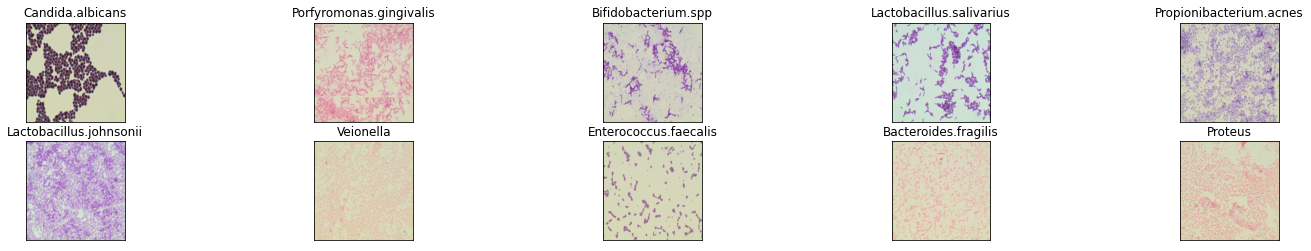

time: 3.68 s (started: 2022-12-04 22:51:33 +00:00)


In [ ]:
original_loader = torch.utils.data.DataLoader(dataset=original, batch_size=32, shuffle=True)
dataset_iterable = iter(original_loader)
images, labels = next(dataset_iterable)
fig = plt.figure(figsize=(25,4))
for i in np.arange(10): #showing sample of 16 images
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[i]))
  ax.set_title(classes[labels[i].item()])

# Neural Network Construction

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # use gpu for accelerated computation

time: 807 ms (started: 2022-12-04 22:51:37 +00:00)


In [ ]:
model = models.resnet18(pretrained=True) #pretrained model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

time: 1 s (started: 2022-12-04 22:51:38 +00:00)


In [ ]:
model.classifier = nn.Sequential(nn.Dropout(p=0.6, inplace=False),
                                 nn.Linear(2084,33))
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

time: 5.93 s (started: 2022-12-04 22:51:39 +00:00)


# Neural Network Complexity

In [ ]:
from torchsummary import summary

print(summary(model, (3, 224, 224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

# Neural Network Implementation

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

time: 1.06 ms (started: 2022-12-04 22:51:52 +00:00)


In [ ]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

time: 530 µs (started: 2022-12-04 22:51:52 +00:00)


In [ ]:
torch.random.manual_seed(42)
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:

    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    score, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)

        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        val_score, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float()/len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print("epoch number: {}".format(e+1))
    print("training loss: {:.4f}".format(epoch_loss))
    print("training acc: {:.4f}".format(epoch_acc.item()))
    print("validation loss: {:.4f}".format(val_epoch_loss))
    print("validation acc: {:.4f}".format(val_epoch_acc.item()))

epoch number: 1
training loss: 0.0509
training acc: 0.6909
validation loss: 0.0109
validation acc: 0.8912
epoch number: 2
training loss: 0.0051
training acc: 0.9555
validation loss: 0.0050
validation acc: 0.9619
epoch number: 3
training loss: 0.0027
training acc: 0.9744
validation loss: 0.0040
validation acc: 0.9619
epoch number: 4
training loss: 0.0019
training acc: 0.9850
validation loss: 0.0034
validation acc: 0.9683
epoch number: 5
training loss: 0.0025
training acc: 0.9780
validation loss: 0.0040
validation acc: 0.9619
epoch number: 6
training loss: 0.0014
training acc: 0.9868
validation loss: 0.0028
validation acc: 0.9737
epoch number: 7
training loss: 0.0018
training acc: 0.9853
validation loss: 0.0035
validation acc: 0.9646
epoch number: 8
training loss: 0.0014
training acc: 0.9880
validation loss: 0.0024
validation acc: 0.9773
epoch number: 9
training loss: 0.0009
training acc: 0.9927
validation loss: 0.0025
validation acc: 0.9746
epoch number: 10
training loss: 0.0009
trainin

Plots of loss and accuracy

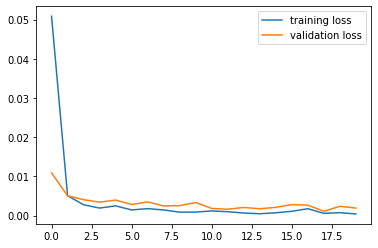

time: 184 ms (started: 2022-12-04 23:40:17 +00:00)


In [ ]:
plt.plot(running_loss_history, label="training loss")
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

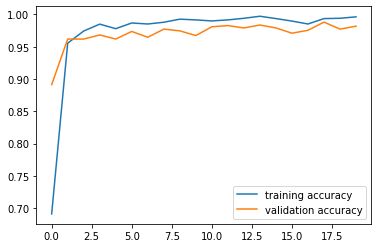

time: 147 ms (started: 2022-12-04 23:40:17 +00:00)


In [ ]:
for i in range(len(running_corrects_history)):
  running_corrects_history[i] = running_corrects_history[i].cpu()

for i in range(len(val_running_corrects_history)):
  val_running_corrects_history[i] = val_running_corrects_history[i].cpu()

plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

Sample of Dataset Classification

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

time: 771 ms (started: 2022-12-04 23:40:17 +00:00)


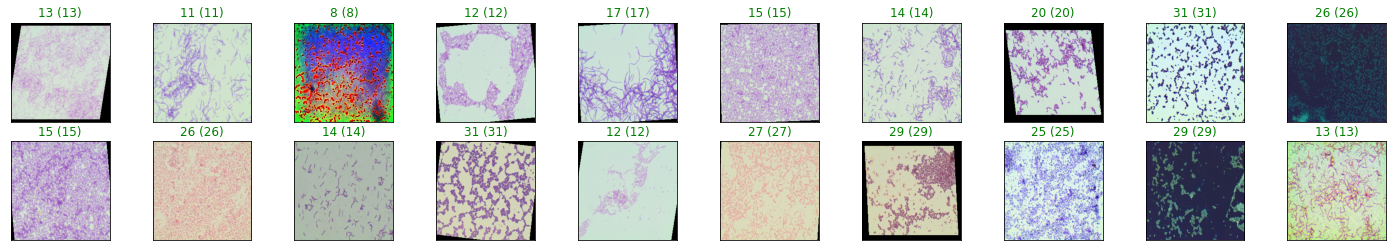

time: 1.06 s (started: 2022-12-04 23:40:18 +00:00)


In [ ]:
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(convert_to_image(images[idx].cpu()))
  ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())), color=("green" if preds[idx]==labels[idx] else "red"))

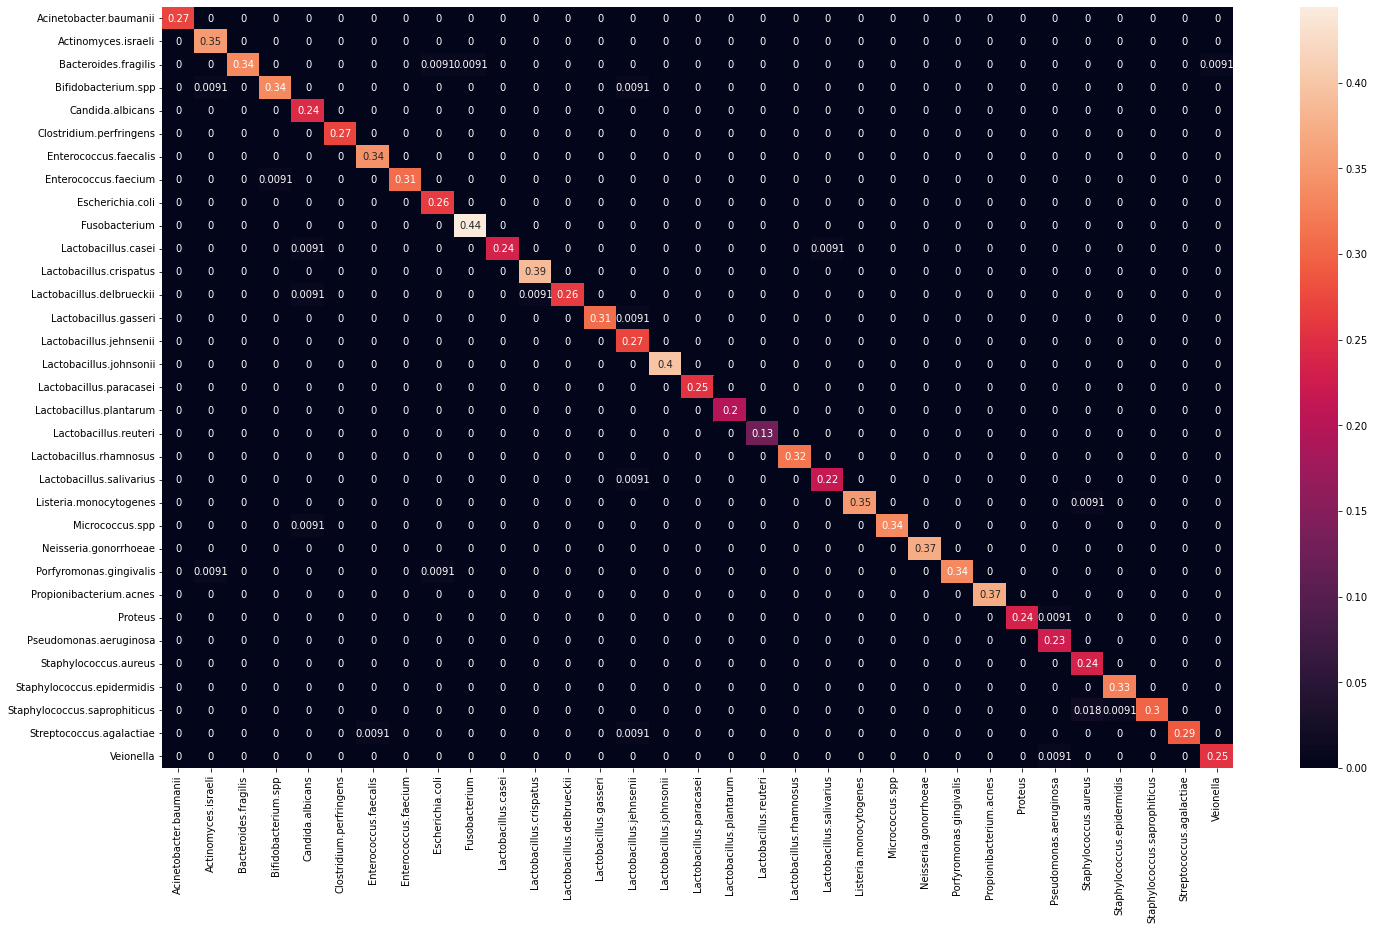

time: 32.6 s (started: 2022-12-04 23:40:19 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

test_running_corrects = 0.0

# iterate over test data
for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        output = model(images)

        test_loss = criterion(output, labels)
        test_score, test_preds = torch.max(output, 1)
        test_running_corrects += torch.sum(test_preds == labels.data)

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output)

        labels = labels.data.cpu().numpy()
        y_true.extend(labels)

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (24,14))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
import sklearn
sklearn.metrics.precision_recall_fscore_support(y_true, y_pred, average = "weighted")

(0.9805301486678372, 0.9791477787851315, 0.9792381230455411, None)

time: 10.3 ms (started: 2022-12-04 23:40:51 +00:00)


In [2]:
test_epoch_acc = test_running_corrects.float()/len(test_loader.dataset)
print("test acc: {:.6f}".format(test_epoch_acc.item()))

test acc: 0.957412
time: 789 µs (started: 2022-12-04 23:40:51 +00:00)
